In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


In [2]:
!pip install git+https://github.com/albumentations-team/albumentations.git

  Cloning https://github.com/albumentations-team/albumentations.git to /tmp/pip-req-build-jzy6r0w6
  Running command git clone -q https://github.com/albumentations-team/albumentations.git /tmp/pip-req-build-jzy6r0w6
  Created wheel for albumentations: filename=albumentations-1.0.3-cp37-none-any.whl size=98755 sha256=7d1696386cf6affd16a872576732afeff73179492fa8f3884cf8e8c6aec4a22f
  Stored in directory: /tmp/pip-ephem-wheel-cache-cmnze4md/wheels/e2/85/3e/2a40fac5cc1f43ced656603bb2fca1327b30ec7de1b1b66517
Successfully built albumentations


In [3]:
!git clone https://github.com/avinash3147/eva_pytorch_wrapper.git /content/drive/MyDrive/EVA6/eva_pytorch_wrapper

Cloning into '/content/drive/MyDrive/EVA6/eva_pytorch_wrapper'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 46 (delta 11), reused 45 (delta 10), pack-reused 0
Unpacking objects: 100% (46/46), done.


In [4]:
%cd "/content/drive/MyDrive/EVA6"

/content/drive/MyDrive/EVA6


## **Import Custom Libraries** from eva_pytorch_wrapper repo

In [5]:
from __future__ import print_function
import torch
import torchvision
from pprint import pprint

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

# Custom Libraries
from eva_pytorch_wrapper.models.resnet import ResNet18
from eva_pytorch_wrapper.models.custom_resnet import CustomResnet
from eva_pytorch_wrapper.utils.graph_utility import two_variable_plot, plot_accuracy_loss_curves, plot_misclassified_images
from eva_pytorch_wrapper.utils.misc import process_cnfig, get_data_loader_args, check_cuda_availability,\
    get_model_summary, lr_finder, load_optimizer, get_wrong_predictions, run_epochs
from eva_pytorch_wrapper.utils.data_utility import download_train_data, download_test_data, load_train_data, \
    load_test_data, get_train_transformations, get_test_transformations

## **Load Configuration File**

In [6]:
config = process_cnfig(file_name='/content/drive/MyDrive/EVA6/eva_pytorch_wrapper/config/config.yaml')

********** Loading configuration... **********


## **Train and Test Transforms**

In [7]:
train_transforms = get_train_transformations(
    data_augmentation_type= config['data_augmentation']['type'],
    mean= config['mean']['value'],
    std= config['std']['value']
) # Get Train Transformations

test_transforms = get_test_transformations(
    data_augmentation_type= config['data_augmentation']['type'],
    mean= config['mean']['value'],
    std= config['std']['value']
) # Get Test Tranformations

## **Download Train and Test Data**

In [8]:
train_data = download_train_data(
    dataset_type= config['data_set']['type'],
    train_transforms= train_transforms
) # Get Train Data

test_data = download_test_data(
    dataset_type= config['data_set']['type'],
    test_transforms= test_transforms
) # Get Test Data

Files already downloaded and verified
Files already downloaded and verified


## **Load Train and Test Data**

In [9]:
cuda = check_cuda_availability() # Check if cuda is available or not

data_loader_args = get_data_loader_args(cuda=cuda) # Get Data Loader Arguments

train_loader = load_train_data(
    train_data= train_data,
    **data_loader_args
) # Load Train Data

test_loader = load_test_data(
    test_data= test_data,
    **data_loader_args
) # Load Test Data

device = torch.device("cuda" if cuda else "cpu")

## **Model Summary**

In [10]:
model = eval(config['model']['type'])().to(device)

get_model_summary(
    model= model,
    input_size= config['input_size']['value']
) # Get Model Summary

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 256,

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


## **LR Finder**

In [11]:
lr_train_accuracy, test_lr = lr_finder(
    train_loader= train_loader,
    device= device,
    model= model,
    max_lr=config['max_lr']['value'],
    min_lr=config['min_lr']['value'],
    epochs=config['lr_finder_epochs']['value'],
    momentum=config['momentum']['value'],
    weight_decay=config['weight_decay']['value']
)

epoch = 1 Lr = 0.001  Loss=1.4907392263412476 Batch_id=97 Accuracy=37.20: 100%|██████████| 98/98 [00:22<00:00,  4.31it/s]
epoch = 2 Lr = 0.0029  Loss=1.2901532649993896 Batch_id=97 Accuracy=42.48: 100%|██████████| 98/98 [00:23<00:00,  4.24it/s]
epoch = 3 Lr = 0.0048  Loss=1.2784160375595093 Batch_id=97 Accuracy=43.10: 100%|██████████| 98/98 [00:23<00:00,  4.18it/s]
epoch = 4 Lr = 0.006699999999999999  Loss=1.188271164894104 Batch_id=97 Accuracy=41.01: 100%|██████████| 98/98 [00:24<00:00,  4.07it/s]
epoch = 5 Lr = 0.0086  Loss=1.450678825378418 Batch_id=97 Accuracy=31.83: 100%|██████████| 98/98 [00:24<00:00,  4.03it/s]
epoch = 6 Lr = 0.0105  Loss=1.6563034057617188 Batch_id=97 Accuracy=24.01: 100%|██████████| 98/98 [00:24<00:00,  4.01it/s]
epoch = 7 Lr = 0.012400000000000001  Loss=1.883538007736206 Batch_id=97 Accuracy=19.94: 100%|██████████| 98/98 [00:24<00:00,  3.97it/s]
epoch = 8 Lr = 0.014300000000000002  Loss=1.943182110786438 Batch_id=97 Accuracy=18.98: 100%|██████████| 98/98 [00:

********************************


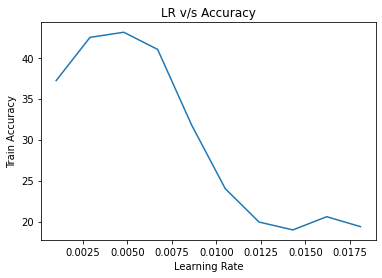

********************************


In [12]:
two_variable_plot(
    x= test_lr,
    y= lr_train_accuracy,
    xlabel= "Learning Rate",
    ylabel= "Train Accuracy",
    title= "LR v/s Accuracy"
) # Plot Accuracy vs LR

## **Load Optimizer**

In [13]:
optimizer = load_optimizer(
    model= model,
    learning_rate= config['learning_rate']['value'],
    momentum=config['momentum']['value'], 
    weight_decay=config['optimizer_weight_decay']['value']
) # load Optimizer

## **Run Train and Test Loop**

In [14]:
train_accuracy, train_losses, test_accuracy, test_losses, LR = run_epochs(
    train_loader= train_loader, 
    test_loader= test_loader, 
    device= device, 
    model= model, 
    optimizer= optimizer, 
    train_epochs= config['train_epochs']['value'], 
    pct_start= config['pct_start']['value'], 
    anneal_strategy= config['anneal_strategy']['value'],
    cycle_momentum= config['cycle_momentum']['value'],
    base_momentum= config['base_momentum']['value'],
    max_momentum= config['max_momentum']['value'],
    div_factor= config['div_factor']['value'],
    final_div_factor= config['final_div_factor']['value']
) # Run Train and Test Loop

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1 LR: 0.0012400000000000002


Loss=1.3324846029281616 Batch_id=97 Accuracy=39.70: 100%|██████████| 98/98 [00:25<00:00,  3.82it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 5101/10000 (51.01%)

EPOCH: 2 LR: 0.004031538194515345


Loss=1.1044466495513916 Batch_id=97 Accuracy=57.08: 100%|██████████| 98/98 [00:25<00:00,  3.81it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 6352/10000 (63.52%)

EPOCH: 3 LR: 0.0068230763890306904


Loss=0.8245029449462891 Batch_id=97 Accuracy=65.51: 100%|██████████| 98/98 [00:25<00:00,  3.85it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 6842/10000 (68.42%)

EPOCH: 4 LR: 0.009614614583546037


Loss=0.8510122895240784 Batch_id=97 Accuracy=71.35: 100%|██████████| 98/98 [00:25<00:00,  3.84it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0016, Accuracy: 7273/10000 (72.73%)

EPOCH: 5 LR: 0.012398769630301102


Loss=0.6641784906387329 Batch_id=97 Accuracy=74.59: 100%|██████████| 98/98 [00:25<00:00,  3.82it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0015, Accuracy: 7425/10000 (74.25%)

EPOCH: 6 LR: 0.011840546340985376


Loss=0.514582097530365 Batch_id=97 Accuracy=79.39: 100%|██████████| 98/98 [00:25<00:00,  3.86it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0013, Accuracy: 7810/10000 (78.10%)

EPOCH: 7 LR: 0.011282323051669648


Loss=0.45476776361465454 Batch_id=97 Accuracy=82.07: 100%|██████████| 98/98 [00:25<00:00,  3.85it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0012, Accuracy: 8029/10000 (80.29%)

EPOCH: 8 LR: 0.010724099762353922


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 8216/10000 (82.16%)

EPOCH: 9 LR: 0.010165876473038196


Loss=0.344858318567276 Batch_id=97 Accuracy=85.97: 100%|██████████| 98/98 [00:25<00:00,  3.86it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8463/10000 (84.63%)

EPOCH: 10 LR: 0.00960765318372247


Loss=0.40876755118370056 Batch_id=97 Accuracy=87.67: 100%|██████████| 98/98 [00:25<00:00,  3.86it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8332/10000 (83.32%)

EPOCH: 11 LR: 0.009049429894406744


Loss=0.32405051589012146 Batch_id=97 Accuracy=88.73: 100%|██████████| 98/98 [00:25<00:00,  3.85it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8689/10000 (86.89%)

EPOCH: 12 LR: 0.008491206605091017


Loss=0.2987346053123474 Batch_id=97 Accuracy=89.95: 100%|██████████| 98/98 [00:25<00:00,  3.83it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8465/10000 (84.65%)

EPOCH: 13 LR: 0.00793298331577529


Loss=0.3228938579559326 Batch_id=97 Accuracy=90.79: 100%|██████████| 98/98 [00:25<00:00,  3.86it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8571/10000 (85.71%)

EPOCH: 14 LR: 0.007374760026459565


Loss=0.2743276059627533 Batch_id=97 Accuracy=91.86: 100%|██████████| 98/98 [00:25<00:00,  3.84it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8591/10000 (85.91%)

EPOCH: 15 LR: 0.006816536737143838


Loss=0.2675950527191162 Batch_id=97 Accuracy=92.87: 100%|██████████| 98/98 [00:25<00:00,  3.86it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8604/10000 (86.04%)

EPOCH: 16 LR: 0.006258313447828112


Loss=0.1867714524269104 Batch_id=97 Accuracy=93.73: 100%|██████████| 98/98 [00:25<00:00,  3.85it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8803/10000 (88.03%)

EPOCH: 17 LR: 0.005700090158512386


Loss=0.14214812219142914 Batch_id=97 Accuracy=94.39: 100%|██████████| 98/98 [00:25<00:00,  3.85it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8796/10000 (87.96%)

EPOCH: 18 LR: 0.005141866869196659


Loss=0.19840487837791443 Batch_id=97 Accuracy=95.06: 100%|██████████| 98/98 [00:25<00:00,  3.84it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8902/10000 (89.02%)

EPOCH: 19 LR: 0.004583643579880933


Loss=0.12938977777957916 Batch_id=97 Accuracy=95.88: 100%|██████████| 98/98 [00:25<00:00,  3.83it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8777/10000 (87.77%)

EPOCH: 20 LR: 0.004025420290565206


Loss=0.1131475567817688 Batch_id=97 Accuracy=96.01: 100%|██████████| 98/98 [00:25<00:00,  3.84it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8899/10000 (88.99%)

EPOCH: 21 LR: 0.0034671970012494797


Loss=0.09558094292879105 Batch_id=97 Accuracy=96.58: 100%|██████████| 98/98 [00:25<00:00,  3.83it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0006, Accuracy: 8929/10000 (89.29%)

EPOCH: 22 LR: 0.002908973711933752


Loss=0.10135652869939804 Batch_id=97 Accuracy=97.03: 100%|██████████| 98/98 [00:25<00:00,  3.84it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0006, Accuracy: 9009/10000 (90.09%)

EPOCH: 23 LR: 0.002350750422618026


Loss=0.08231621980667114 Batch_id=97 Accuracy=97.38: 100%|██████████| 98/98 [00:25<00:00,  3.83it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0006, Accuracy: 9027/10000 (90.27%)

EPOCH: 24 LR: 0.0017925271333023001


Loss=0.1073136106133461 Batch_id=97 Accuracy=97.89: 100%|██████████| 98/98 [00:25<00:00,  3.84it/s]



Test set: Average loss: 0.0006, Accuracy: 9030/10000 (90.30%)



********************************


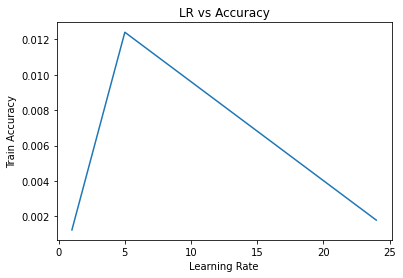

********************************


In [16]:
import numpy as np

two_variable_plot(
    x= np.arange(1, 25),
    y=LR,
    xlabel="Learning Rate",
    ylabel="Train Accuracy",
    title="LR vs Accuracy"
) # Plot LR vs Accuracy

## **Accurcay and Loss Plots**

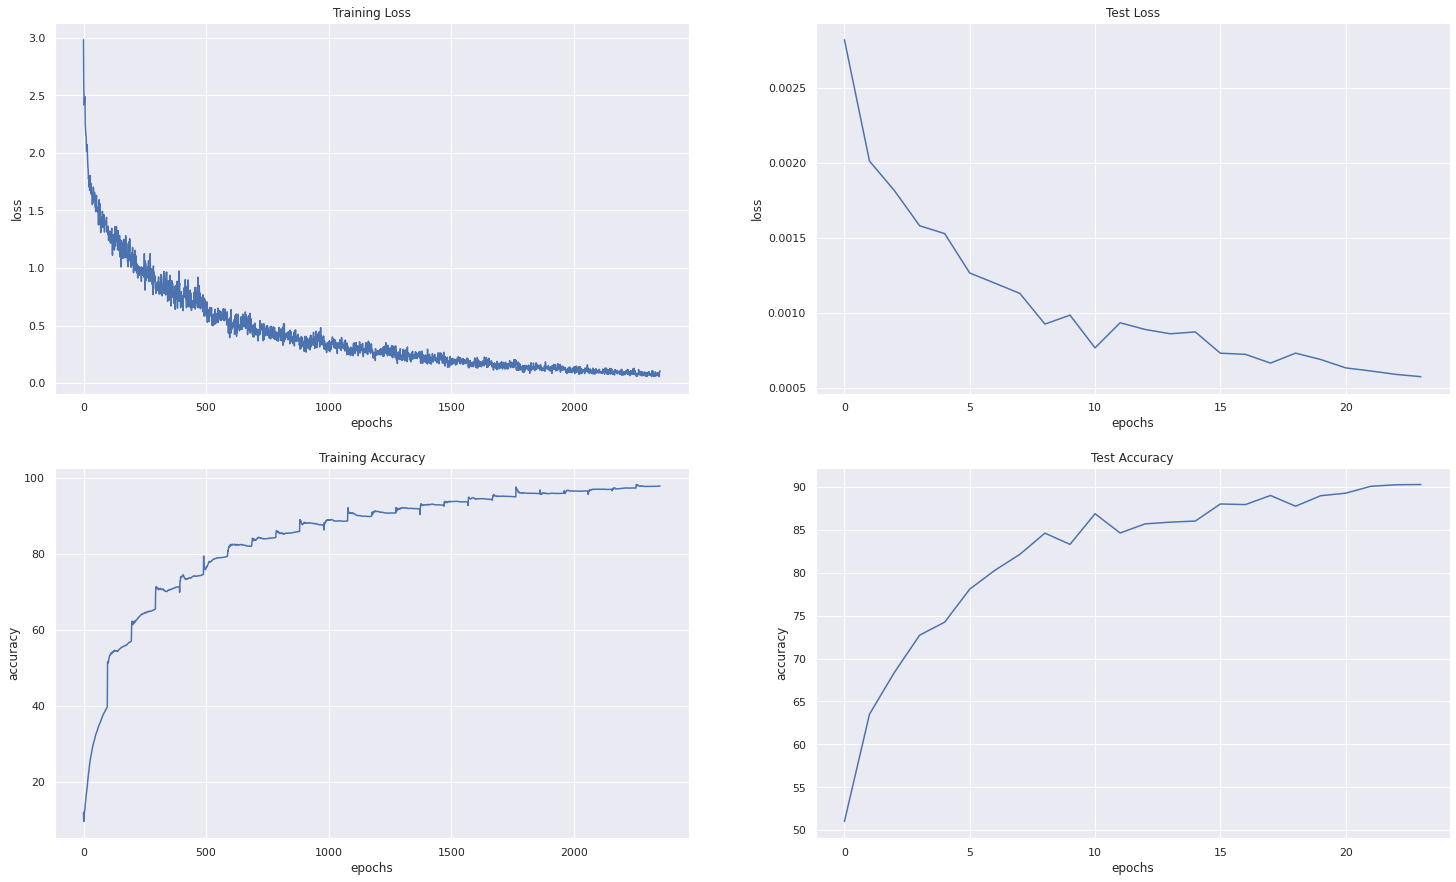

In [17]:
plot_accuracy_loss_curves(
    train_accuracy= train_accuracy, 
    test_accuracy= test_accuracy, 
    train_losses= train_losses, 
    test_losses= test_losses
) # Plot Accuracy And Loss Curves

## **List wrong Predictions**

In [18]:
wrong_predictions, wrong_images, correct_label = get_wrong_predictions(
    model=model,
    test_loader= test_loader,
    device=device
) # Get Wrong Predictions

Total wrong predictions are 970


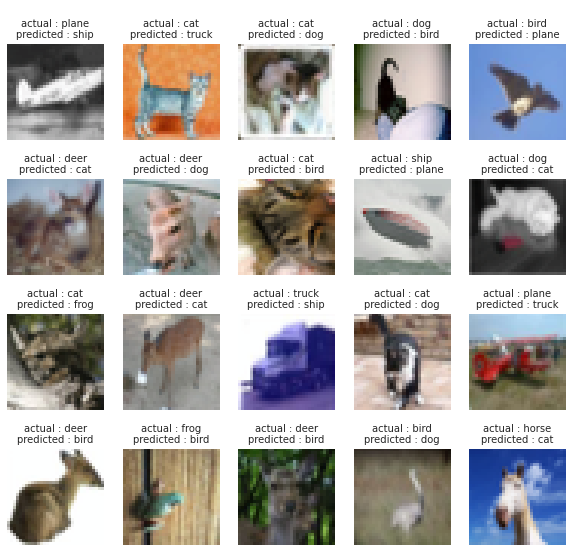

In [25]:
plot_misclassified_images(
    wrong_predictions= wrong_predictions,
    classes=config['classes']['value'],
    mean=config['mean']['value'],
    std=config['std']['value']
)